# Inflow Outflow Transactional Data
## 1. Objectives
### 1.1. Explore Data
1) Explore data, share what you found
2) What are the most common merchants per category?
### 1.2. The Data
1) ucsd-inflows.pqt : representing inflows
2) ucsd-outflows.pqt: representing outflows

## 2. Initial Exploration 

### 2.1. Read Data

In [1]:
import pandas as pd

inflow_df = pd.read_parquet('ucsd-inflows.pqt')
outflow_df = pd.read_parquet('ucsd-outflows.pqt')

print("Inflow Data")
display(inflow_df.head())

print("\nOutflow Data")
display(outflow_df.head())

Inflow Data


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER



Outflow Data


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


### 2.2. Descriptive Statistics (for amount)

In [2]:
# Descriptive statistics for inflows and outflows
print("Inflow Data Statistics")
display(inflow_df.describe())

print("\nOutflow Data Statistics")
display(outflow_df.describe())

Inflow Data Statistics


,prism_consumer_id,amount
count,513115.000000,5.131150e+05
mean,2940.304228,7.346998e+02
std,1753.067672,5.296566e+03
min,0.000000,1.000000e-02
25%,1356.000000,2.058000e+01
50%,2971.000000,1.000000e+02
75%,4458.000000,5.000000e+02
max,5941.000000,1.154966e+06



Outflow Data Statistics


,prism_consumer_id,amount
count,2.597488e+06,2.597488e+06
mean,3.084229e+03,1.451264e+02
std,1.820571e+03,1.697875e+03
min,0.000000e+00,0.000000e+00
25%,1.369000e+03,9.630000e+00
50%,3.245000e+03,2.426000e+01
75%,4.733000e+03,6.636000e+01
max,5.943000e+03,6.548532e+05


### 2.3. Check For Missing Values

In [3]:
# Checking for missing values
print("Missing values in inflow_df")
display(inflow_df.isnull().sum())

print("\nMissing values in outflow_df")
display(outflow_df.isnull().sum())

Missing values in inflow_df


prism_consumer_id    0
prism_account_id     0
memo                 0
amount               0
posted_date          0
category             0
dtype: int64


Missing values in outflow_df


prism_consumer_id    0
prism_account_id     0
memo                 0
amount               0
posted_date          0
category             0
dtype: int64

### 2.4. Unique Categories in Category Column

In [4]:
# Unique values in memo and category columns
print("Unique categories in inflow_df 'category' column:")
display(inflow_df['category'].nunique())
display(inflow_df['category'].unique())

print("\nUnique categories in outflow_df 'category' column:")
display(outflow_df['category'].nunique())
display(outflow_df['category'].unique()[:10])


Unique categories in inflow_df 'category' column:


14

array(['PAYCHECK', 'EXTERNAL_TRANSFER', 'MISCELLANEOUS',
       'INVESTMENT_INCOME', 'TAX', 'DEPOSIT', 'SELF_TRANSFER', 'REFUND',
       'PAYCHECK_PLACEHOLDER', 'INSURANCE', 'OTHER_BENEFITS',
       'UNEMPLOYMENT_BENEFITS', 'LOAN', 'SMALL_DOLLAR_ADVANCE'],
      dtype=object)


Unique categories in outflow_df 'category' column:


29

array(['LOAN', 'ATM_CASH', 'FOOD_AND_BEVERAGES', 'ENTERTAINMENT',
       'GENERAL_MERCHANDISE', 'ESSENTIAL_SERVICES', 'GROCERIES',
       'EXTERNAL_TRANSFER', 'AUTOMOTIVE', 'UNCATEGORIZED'], dtype=object)

### 2.5. Data Range

In [5]:
# Convert 'posted_date' to datetime
inflow_df['posted_date'] = pd.to_datetime(inflow_df['posted_date'])
outflow_df['posted_date'] = pd.to_datetime(outflow_df['posted_date'])

# Get the date range
print("Date range in inflow_df:")
display(inflow_df['posted_date'].min(), inflow_df['posted_date'].max())

print("\nDate range in outflow_df:")
display(outflow_df['posted_date'].min(), outflow_df['posted_date'].max())

Date range in inflow_df:


Timestamp('2017-12-29 00:00:00')

Timestamp('2023-08-01 00:00:00')


Date range in outflow_df:


Timestamp('2017-12-29 00:00:00')

Timestamp('2023-08-01 00:00:00')

## 3. Visualizations

In [6]:
import matplotlib.pyplot as plt

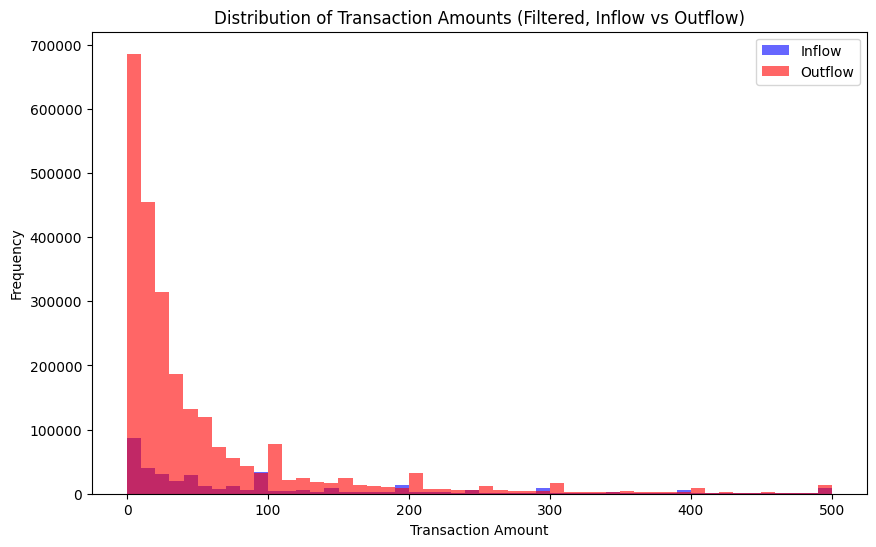

In [7]:
# Define a threshold for maximum transaction value
max_threshold = 500

# Filter the datasets
filtered_inflow_df = inflow_df[inflow_df['amount'] <= max_threshold]
filtered_outflow_df = outflow_df[outflow_df['amount'] <= max_threshold]

# Plot the filtered distribution of transaction amounts for inflows and outflows
plt.figure(figsize=(10, 6))
plt.hist(filtered_inflow_df['amount'], bins=50, alpha=0.6, label='Inflow', color='blue')
plt.hist(filtered_outflow_df['amount'], bins=50, alpha=0.6, label='Outflow', color='red')
plt.title('Distribution of Transaction Amounts (Filtered, Inflow vs Outflow)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

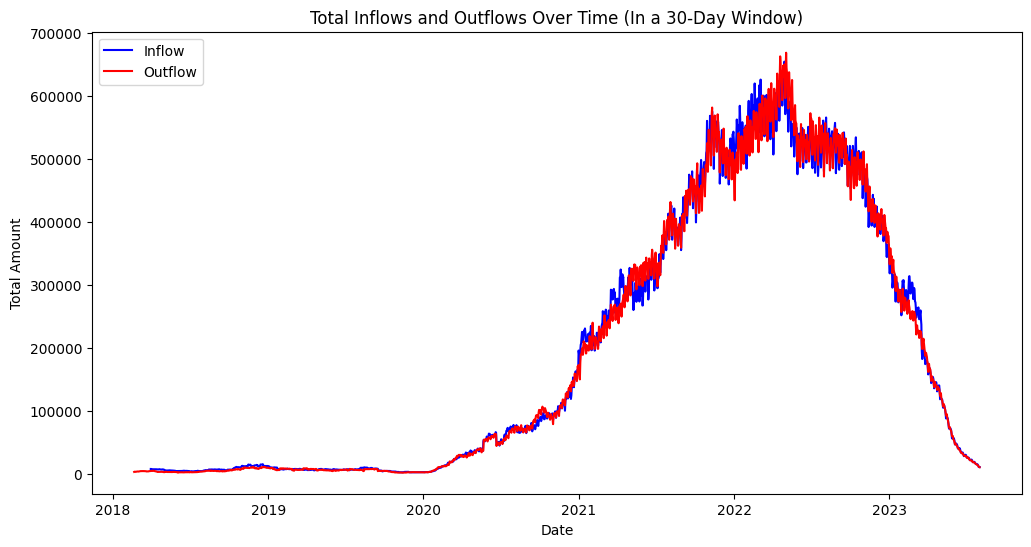

In [8]:
rolling_window = 30

# Group by posted_date to get total daily inflows and outflows
inflow_by_date = inflow_df.groupby('posted_date')['amount'].sum()
outflow_by_date = outflow_df.groupby('posted_date')['amount'].sum()

# Apply the rolling mean on the daily inflow and outflow totals
inflow_by_date = inflow_by_date.rolling(window=rolling_window).mean()
outflow_by_date = outflow_by_date.rolling(window=rolling_window).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(inflow_by_date, label='Inflow', color='blue')
plt.plot(outflow_by_date, label='Outflow', color='red')
plt.title(f'Total Inflows and Outflows Over Time (In a {rolling_window}-Day Window)')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend(loc='upper left')
plt.show()


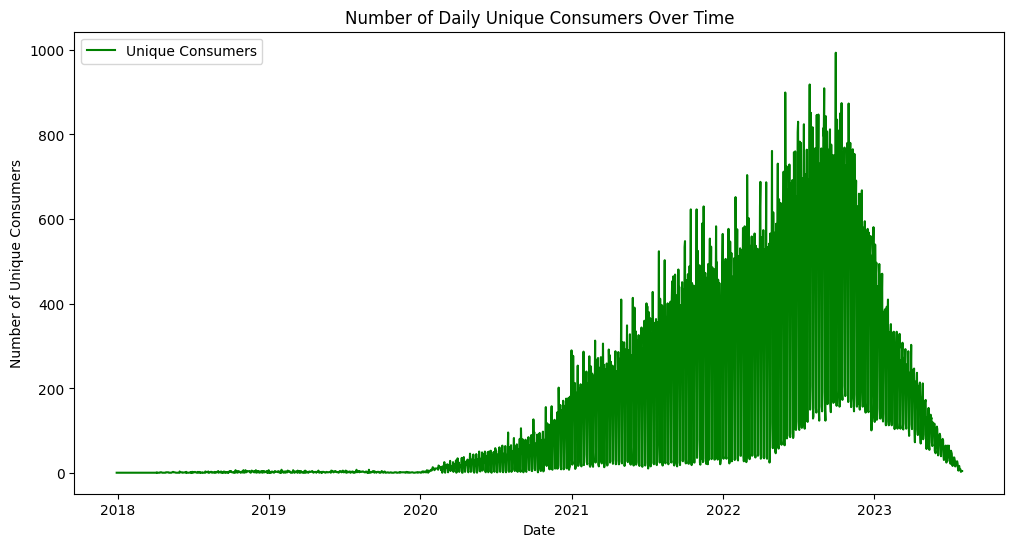

In [9]:
# Count unique consumers per day
unique_consumers_per_day = inflow_df.groupby('posted_date')['prism_consumer_id'].nunique()

# Plot the count of unique consumers over time
plt.figure(figsize=(12, 6))
plt.plot(unique_consumers_per_day, label='Unique Consumers', color='green')
plt.title('Number of Daily Unique Consumers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Consumers')
plt.legend(loc='upper left')
plt.show()

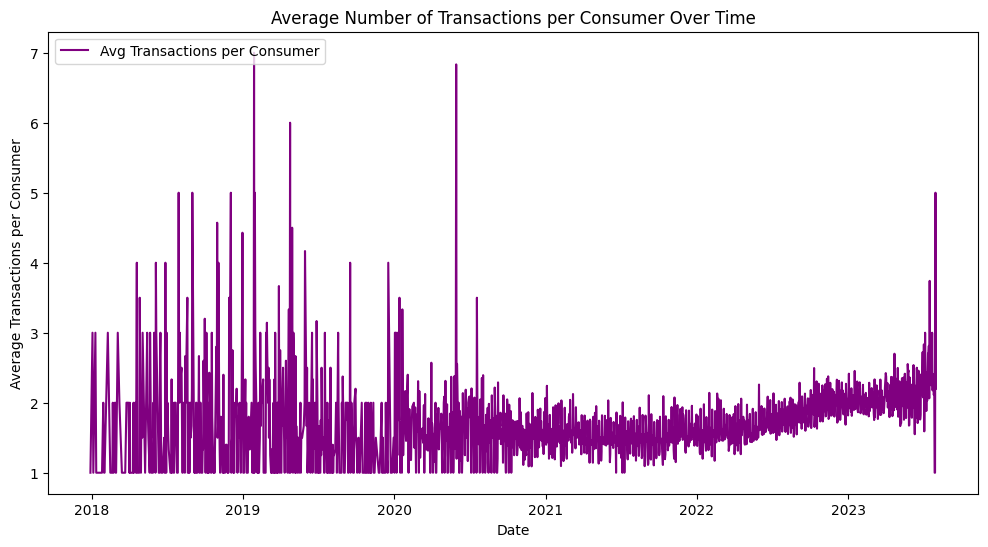

In [10]:
# Group by date and consumer to count transactions, then get the average number of transactions per consumer
transactions_per_consumer = inflow_df.groupby(['posted_date', 'prism_consumer_id']).size().groupby('posted_date').mean()

# Plot the average transactions per consumer over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_consumer, label='Avg Transactions per Consumer', color='purple')
plt.title('Average Number of Transactions per Consumer Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transactions per Consumer')
plt.legend(loc='upper left')
plt.show()

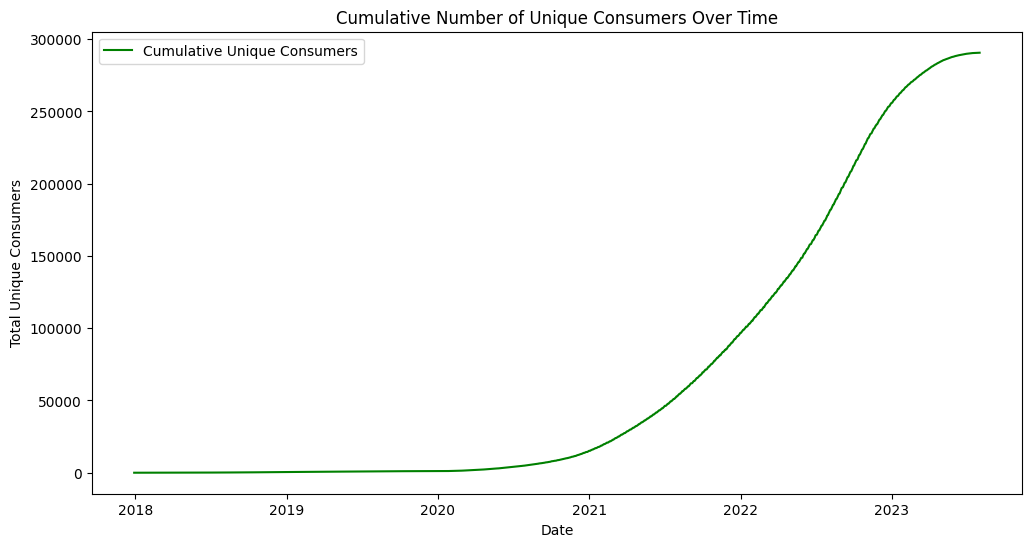

In [11]:
# Sort data by date to ensure correct cumulative calculations
inflow_df = inflow_df.sort_values('posted_date')

# Get the unique consumers seen cumulatively over time
cumulative_unique_consumers = inflow_df.groupby('posted_date')['prism_consumer_id'].nunique().cumsum()

# Plot cumulative unique consumers over time
plt.figure(figsize=(12, 6))
plt.plot(cumulative_unique_consumers, label='Cumulative Unique Consumers', color='green')
plt.title('Cumulative Number of Unique Consumers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Unique Consumers')
plt.legend(loc='upper left')
plt.show()

Number of early customers: 410
Number of early customers still active: 7
Proportion of early customers still active: 1.71%


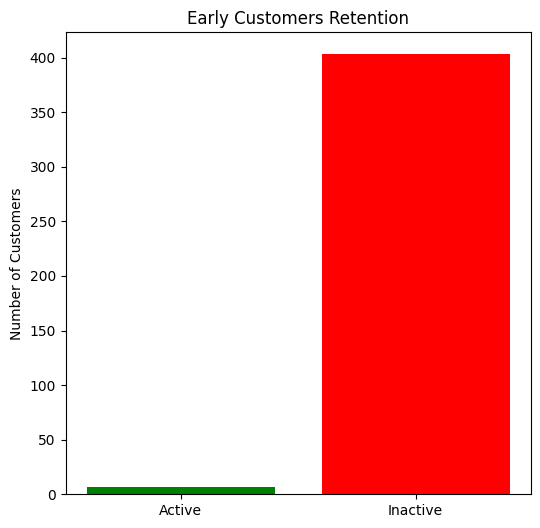

In [12]:
# Define the early period
early_period_end = '2020-12-29'

# Identify early customers
early_customers = inflow_df[inflow_df['posted_date'] <= early_period_end]['prism_consumer_id'].unique()

print(f"Number of early customers: {len(early_customers)}")

# Define the recent period
recent_period_start = '2023-01-01'

# Find the unique customers who had transactions in the recent period
recent_customers = inflow_df[inflow_df['posted_date'] >= recent_period_start]['prism_consumer_id'].unique()

# Find the intersection between early and recent customers
active_early_customers = set(early_customers).intersection(set(recent_customers))

print(f"Number of early customers still active: {len(active_early_customers)}")

# Calculate the proportion of early customers who are still active
proportion_active = len(active_early_customers) / len(early_customers)

print(f"Proportion of early customers still active: {proportion_active:.2%}")

# Plot the proportion of active vs. inactive early customers
plt.figure(figsize=(6, 6))
plt.bar(['Active', 'Inactive'], [len(active_early_customers), len(early_customers) - len(active_early_customers)], color=['green', 'red'])
plt.title('Early Customers Retention')
plt.ylabel('Number of Customers')
plt.show()


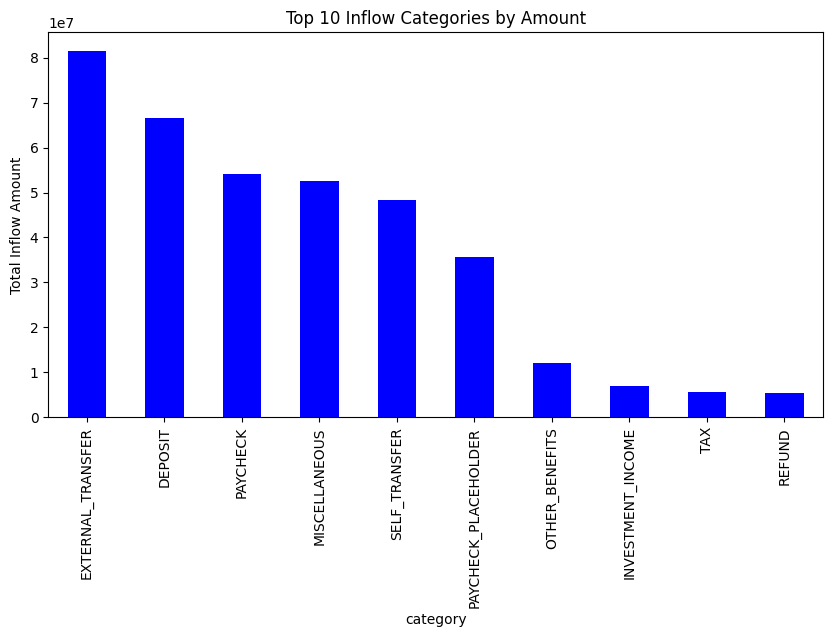

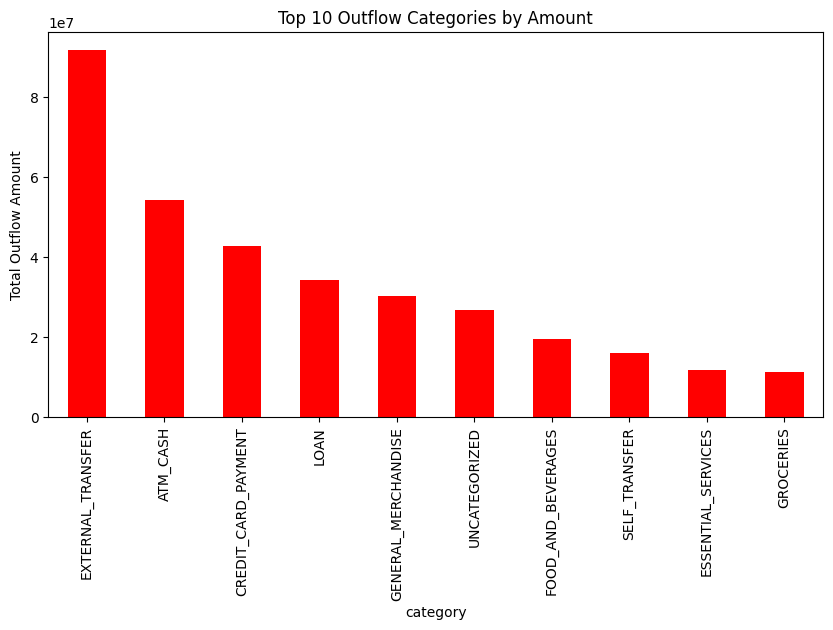

In [13]:
# Top 10 categories by inflow amount
top_inflow_categories = inflow_df.groupby('category')['amount'].sum().nlargest(10)
top_outflow_categories = outflow_df.groupby('category')['amount'].sum().nlargest(10)

# Plot top inflow categories
plt.figure(figsize=(10, 5))
top_inflow_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Inflow Categories by Amount')
plt.ylabel('Total Inflow Amount')
plt.show()

# Plot top outflow categories
plt.figure(figsize=(10, 5))
top_outflow_categories.plot(kind='bar', color='red')
plt.title('Top 10 Outflow Categories by Amount')
plt.ylabel('Total Outflow Amount')
plt.show()


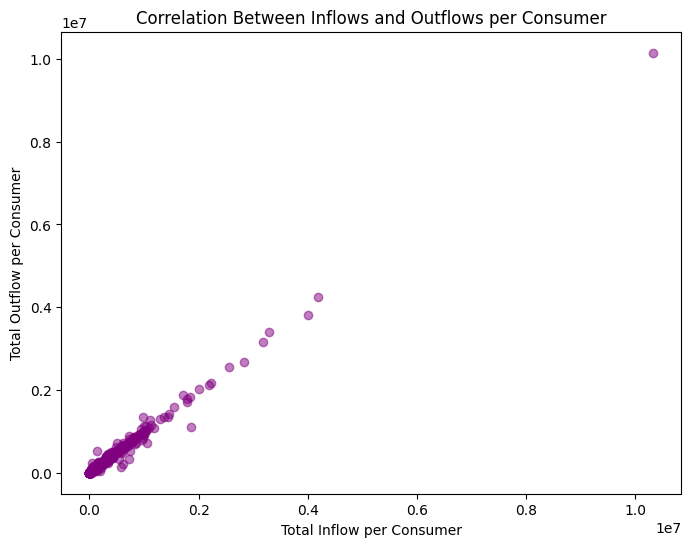

In [14]:
# Grouping inflows and outflows by consumer_id and summing amounts
inflow_per_consumer = inflow_df.groupby('prism_consumer_id')['amount'].sum()
outflow_per_consumer = outflow_df.groupby('prism_consumer_id')['amount'].sum()

# Merging the inflow and outflow summaries by consumer_id
merged_inflow_outflow = pd.merge(inflow_per_consumer, outflow_per_consumer, on='prism_consumer_id', how='inner', suffixes=('_inflow', '_outflow'))

# Scatter plot to show correlation
plt.figure(figsize=(8, 6))
plt.scatter(merged_inflow_outflow['amount_inflow'], merged_inflow_outflow['amount_outflow'], alpha=0.5, color='purple')
plt.title('Correlation Between Inflows and Outflows per Consumer')
plt.xlabel('Total Inflow per Consumer')
plt.ylabel('Total Outflow per Consumer')
plt.show()

## 4. What are the most common merchants per category?

In [15]:
# Group inflow and outflow transactions by category and memo, and get the transaction counts
inflow_merchant_counts = inflow_df.groupby(['category', 'memo']).size().reset_index(name='count')
outflow_merchant_counts = outflow_df.groupby(['category', 'memo']).size().reset_index(name='count')

# Sort by category and count, then find the most common merchant for each category in inflows
most_common_inflow_merchants = inflow_merchant_counts.sort_values(['category', 'count'], ascending=[True, False]) \
                                                      .groupby('category').head(1)
print("Most Common Merchants per Category (Inflow):")
display(most_common_inflow_merchants)

# Sort by category and count, then find the most common merchant for each category in outflows
most_common_outflow_merchants = outflow_merchant_counts.sort_values(['category', 'count'], ascending=[True, False]) \
                                                       .groupby('category').head(1)
print("Most Common Merchants per Category (Outflow):")
display(most_common_outflow_merchants)


Most Common Merchants per Category (Inflow):


,category,memo,count
0,DEPOSIT,DEPOSIT,61345
1,EXTERNAL_TRANSFER,EXTERNAL_TRANSFER,156533
2,INSURANCE,INSURANCE,174
3,INVESTMENT_INCOME,INVESTMENT_INCOME,17325
4,LOAN,LOAN,2513
5,MISCELLANEOUS,MISCELLANEOUS,55648
6,OTHER_BENEFITS,OTHER_BENEFITS,7708
7,PAYCHECK,PAYCHECK,33138
8,PAYCHECK_PLACEHOLDER,PAYCHECK_PLACEHOLDER,26087
9,REFUND,REFUND,23220


Most Common Merchants per Category (Outflow):


,category,memo,count
0,ACCOUNT_FEES,ACCOUNT_FEES,37511
1,ATM_CASH,ATM_CASH,117651
2,AUTOMOTIVE,AUTOMOTIVE,208579
3,AUTO_LOAN,AUTO_LOAN,1
4,BILLS_UTILITIES,BILLS_UTILITIES,23
5,BNPL,BNPL,1543
6,CHILD_DEPENDENTS,CHILD_DEPENDENTS,936
7,CREDIT_CARD_PAYMENT,CREDIT_CARD_PAYMENT,75506
1865,EDUCATION,Teacherspayteachers.com,90
2130,ENTERTAINMENT,ENTERTAINMENT,80885


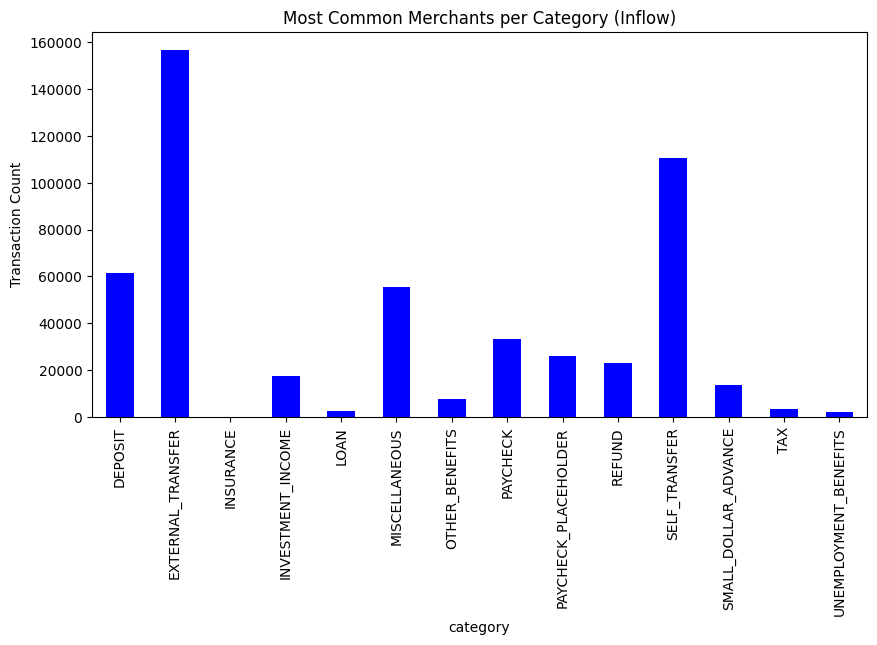

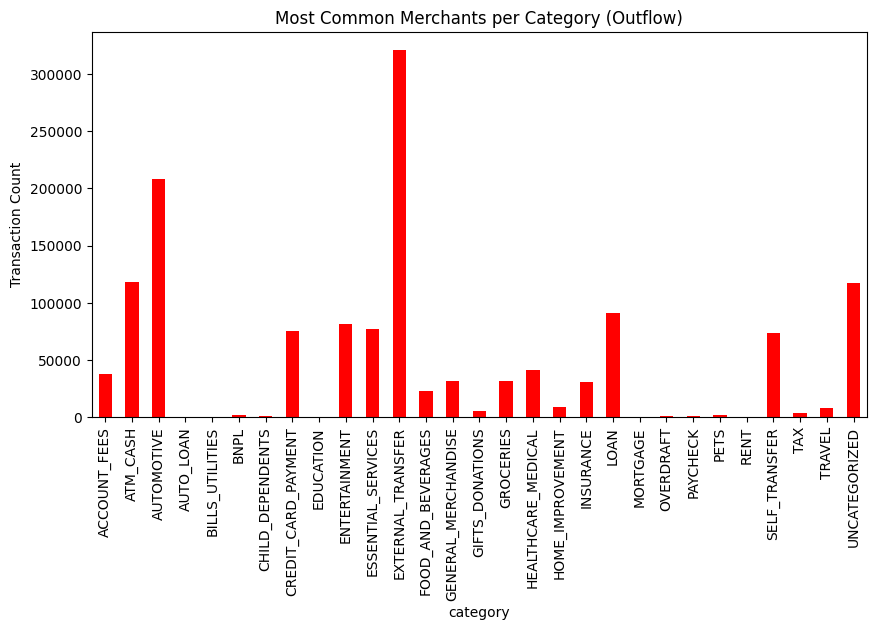

In [16]:
# Top merchants per category (inflows)
plt.figure(figsize=(10, 5))
most_common_inflow_merchants.set_index('category')['count'].plot(kind='bar', color='blue')
plt.title('Most Common Merchants per Category (Inflow)')
plt.ylabel('Transaction Count')
plt.show()

# Top merchants per category (outflows)
plt.figure(figsize=(10, 5))
most_common_outflow_merchants.set_index('category')['count'].plot(kind='bar', color='red')
plt.title('Most Common Merchants per Category (Outflow)')
plt.ylabel('Transaction Count')
plt.show()